In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline  


## Материалы с вебинара по проблеме подглядывания
https://www.youtube.com/watch?v=jnFVmtaeSA0

In [21]:
days = 50
## будем добавлять данные за 50 дней

In [22]:
## параметры распределния для теста и контроля. Одинаковые
mu_control, sigma_control, n_control          = 100, 20, 100
mu_experiment, sigma_experiment, n_experiment = 100, 20, 100

In [23]:
current_date = 1
user_data = pd.DataFrame()
stat_result = pd.DataFrame()
daily_data = pd.DataFrame()

In [24]:
for day in range(days):
    ## генерируем случайные данные для теста и контроля из заявленных распределений
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)
    
    ## создаем табличку с колонками value, date, group для теста и для контроля
    day_data_control = pd.DataFrame({'value': daily_data_control})
    day_data_control['date'] = current_date
    day_data_control['group'] = 'control'
    
    day_data_experiment = pd.DataFrame({'value': daily_data_experiment})
    day_data_experiment['date'] = current_date
    day_data_experiment['group'] = 'experiment'

    ## складываем эти таблички в одну (конкатенируем вниз)
    user_data = user_data.append(day_data_experiment).append(day_data_control)
    
    ## считаем каждый раз t-тест для этих и всех предыдущих значений, складываем t и p для каждого дня в дф
    fit = stats.ttest_ind(
            user_data[user_data.group == 'experiment'].value, 
            user_data[user_data.group == 'control'].value
    )
    stat_result = stat_result.append(pd.DataFrame({'t': [fit[0]], 'p': [fit[1]], 'date': current_date}))
        
    ## считаем среднее значение нашего value в группах и складываем в дф
    current_data_stat = user_data.groupby(['group'], as_index=False).agg({'value': 'mean'})
    current_data_stat['date'] = current_date
    daily_data = daily_data.append(current_data_stat)
    
    current_date += 1


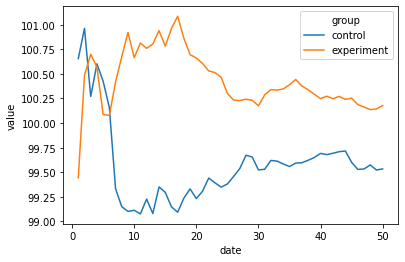

In [203]:
ax = sns.lineplot(data=daily_data, x="date", y="value", hue='group')

In [107]:
## эксперименты
days = 100
mu_control, sigma_control, n_control          = 100, 20, 10
mu_experiment, sigma_experiment, n_experiment = 100, 20, 10
current_date = 1
user_data = pd.DataFrame()
stat_result = pd.DataFrame()
daily_data = pd.DataFrame()

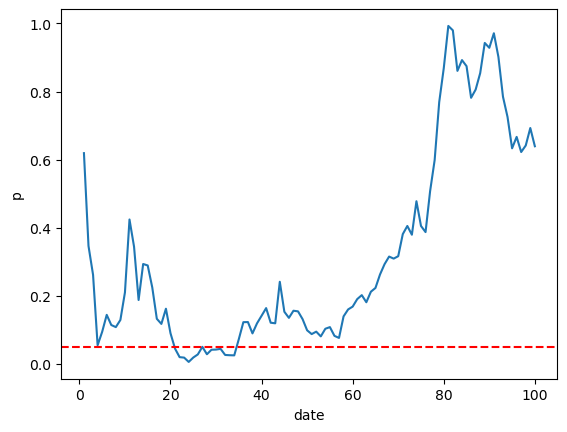

In [108]:
##
for day in range(days):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)
    
    day_data_control = pd.DataFrame({'value': daily_data_control})
    day_data_control['date'] = current_date
    day_data_control['group'] = 'control'

    
    day_data_experiment = pd.DataFrame({'value': daily_data_experiment})
    day_data_experiment['date'] = current_date
    day_data_experiment['group'] = 'experiment'

    
    user_data = user_data.append(day_data_experiment).append(day_data_control)
    fit = stats.ttest_ind(user_data[user_data.group == 'experiment'].value, 
                          user_data[user_data.group == 'control'].value)

    
    stat_result = stat_result.append(pd.DataFrame({'t': [fit[0]], 'p': [fit[1]], 'date': current_date}))
    
    
    current_data_stat = user_data.groupby(['group'], as_index=False).agg({'value': 'mean'})
    current_data_stat['date'] = current_date
    
    daily_data = daily_data.append(current_data_stat)
    
    current_date += 1

# ax = sns.lineplot(data=daily_data, x="date", y="value", hue='group')
# ax.axhline(100, ls=':', color='red');

ax = sns.lineplot(data=stat_result, x="date", y="p")
ax.axhline(0.05, ls='--', color='red');

In [109]:
## нельзя "верить" пробитию p = 0.05

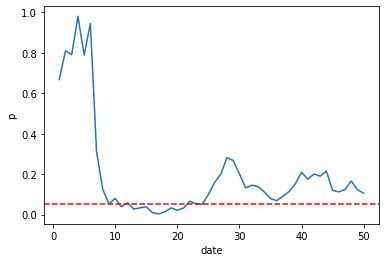

In [204]:
ax = sns.lineplot(data=stat_result, x="date", y="p")
ax.axhline(0.05, ls='--', color='red')

In [59]:
p_values = []

In [60]:
## в эксперименте на 10 тысяч дней? На самом деле просто 10 тысяч экспериментов по одному дню здесь сымитировано?
days = 10000

In [61]:
## при отсутствии отличий
mu_control, sigma_control, n_control = 100, 20, 100
mu_experiment, sigma_experiment, n_experiment = 100, 20, 100

In [62]:
for day in range(days):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)
    
    fit = stats.ttest_ind(daily_data_control, daily_data_experiment)
    
    p_values.append(fit[1])

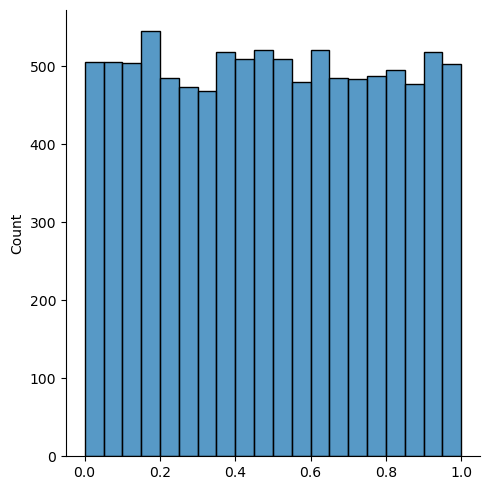

In [63]:
sns.displot(p_values, kde=False, bins=20);

----------

## Как и зачем оценивать размер выборки для A/B теста?

Код из видео Анатолия Карпова: https://www.youtube.com/watch?v=2nP_gcut7SU

Сгененрируем из стандартного распределения со средним 101 выборку. Как часто значения будут > порога? Мощность так определяем

In [2]:
mu_control, sigma_control, n_control = 101, 8, 400

In [3]:
n_positive = 0
total_trials = 10000
threshold = 100.65

In [4]:
for i in range(total_trials):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    
    if daily_data_control.mean() > threshold:
        n_positive += 1
        

In [5]:
n_positive / total_trials

0.816

In [6]:
from statsmodels.stats.power import TTestIndPower

При таких параметрах двук сравниваемых выборок какой рамер выборок надо иметь для мощности 0,95?

In [7]:
mu_control,    sigma_control    = 100, 8
mu_experiment, sigma_experiment = 110, 8



In [8]:
d = (mu_experiment - mu_control) / ((sigma_control**2 + sigma_experiment**2) / 2) ** 0.5

In [9]:
d

1.25

In [11]:
effect = d
alpha = 0.05
power = 0.95
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 17.655


Проверим правда ли такой размер дает нам нужную мощность?

In [99]:
n_control = n_experiment = 18

total_trials = 1000
n_positive = 0

In [100]:
for i in range(total_trials):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)

    fit = stats.ttest_ind(daily_data_control, 
                          daily_data_experiment)
    
    if fit[1] < 0.05:
        n_positive += 1

In [101]:
n_positive / total_trials

0.965